###  Importing The Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# URL of the data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

# Print the first 5 rows of the DataFrame
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Basic information on the Dataset 

In [3]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# EDA (Exploratory Data Analysis)

### Check for Null Values

In [5]:
print(df.isnull().sum())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### Categorical value conversion

In [6]:
df["Revenue"] = df["Revenue"].astype(int)

In [7]:
df["Weekend"] = df["Weekend"].astype(int)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['VisitorType'])
label

array([2, 2, 2, ..., 2, 2, 0])

In [9]:
cnt = 0
visited = []
for i in range(0, len(df['VisitorType'])):
    
    if df['VisitorType'][i] not in visited: 
        
        visited.append(df['VisitorType'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

No.of.unique values : 3
unique values : ['Returning_Visitor', 'New_Visitor', 'Other']


In [10]:
# 'Other' in Visitor type doesn't make sense, so replacing 'others' to 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace(['Other'],'Returning_Visitor')

In [11]:
le = LabelEncoder()
label = le.fit_transform(df['VisitorType'])
label

array([1, 1, 1, ..., 1, 1, 0])

In [12]:
df.drop("VisitorType", axis=1, inplace=True)
 
# Appending the array to our dataFrame
df["VisitorType"] = label

### Droping non-numric columns 

In [13]:
df.drop("Month", axis=1, inplace=True)


## Data Visualization

### A bar plot showing the frequency of each operating system used by the website visitors

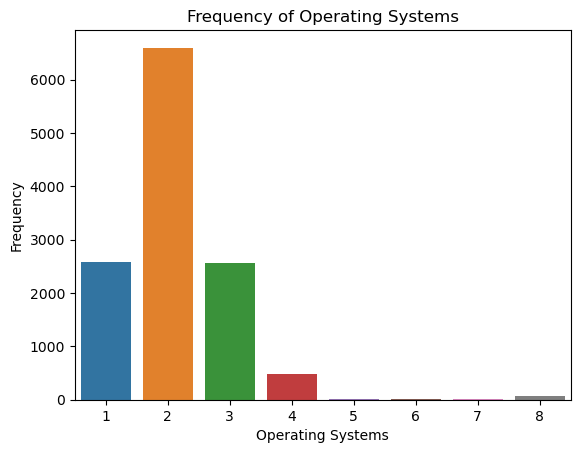

In [14]:
sns.countplot(x='OperatingSystems', data=df)
plt.title('Frequency of Operating Systems')
plt.xlabel('Operating Systems')
plt.ylabel('Frequency')
plt.show()

### A histogram showing the distribution of the time spent on the website by the visitors

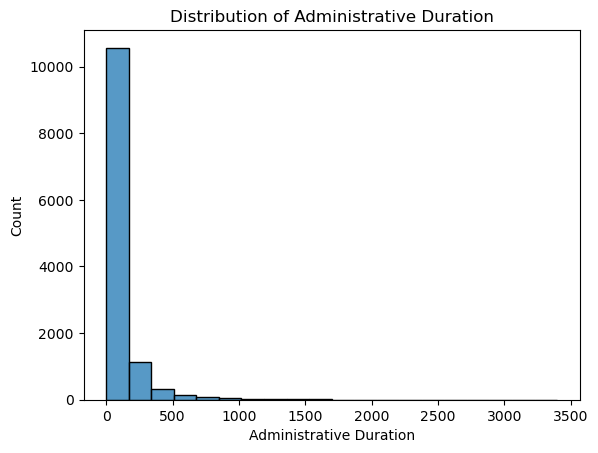

In [15]:
sns.histplot(x='Administrative_Duration', data=df, bins=20)
plt.title('Distribution of Administrative Duration')
plt.xlabel('Administrative Duration')
plt.ylabel('Count')
plt.show()

### A box plot showing the distribution of the bounce rates across different regions

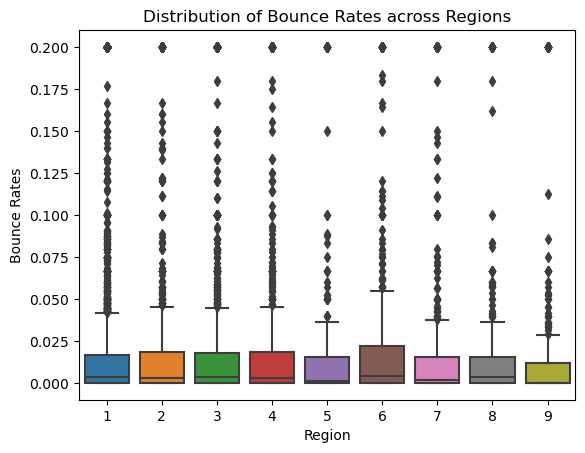

In [16]:
sns.boxplot(x='Region', y='BounceRates', data=df)
plt.title('Distribution of Bounce Rates across Regions')
plt.xlabel('Region')
plt.ylabel('Bounce Rates')
plt.show()

### Countplot of the Target Variable

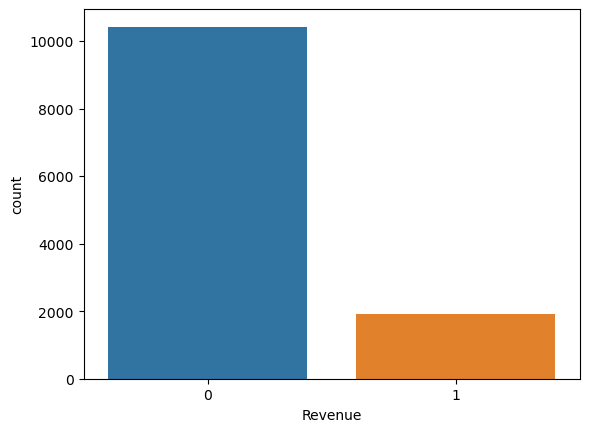

In [17]:
sns.countplot(x='Revenue', data=df)
plt.show()

# Feature Selection and Feature Engineering

### Droping the Target Varaible from df

In [18]:
df.drop('Revenue', axis=1)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,1,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,1,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,0,1


### Selecting X and y columns

In [19]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# PCA(Principal Component Analysis)

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index=X.index)

### Ploting feature importamce graph 

[0.05349017 0.05046701 0.02870005 0.02927102 0.06956014 0.07148338
 0.05831459 0.08009879 0.36793201 0.0083054  0.0323917  0.03230736
 0.04460658 0.04756339 0.01348036 0.01202805]


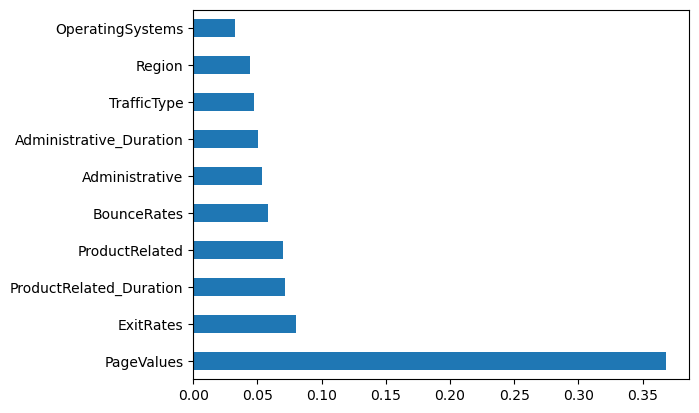

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [22]:
top4 = feat_importances.nlargest(4).index

# Print the feature importances of the top 4 features
print(feat_importances[top4])

PageValues                 0.367932
ExitRates                  0.080099
ProductRelated_Duration    0.071483
ProductRelated             0.069560
dtype: float64


### Here we see that 'PageValues' has the height importance and is greater as comapred to others, There is a huge difference after the forth feature hence selecting top 4 feature and will apply feature scalling to normalize the data points

### Dropping unnecessary columns

In [23]:
X = X.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','BounceRates','SpecialDay','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend'], axis=1)


# Model Building and Model Selection

### Importing necessary libraries and performing train test split

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building Various ML Models

In [25]:
# train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# train decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# train random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

#K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

#Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)




# print model accuracies
print('Logistic Regression Accuracy:', lr_accuracy)
print('Decision Tree Accuracy:', dt_accuracy)
print('Random Forest Accuracy:', rf_accuracy)
print('K-Nearest Neighbors Accuracy:', knn_accuracy)
print('Naive Bayes Classifier Accuracy:', gnb_accuracy)


Logistic Regression Accuracy: 0.8690186536901865
Decision Tree Accuracy: 0.85117599351176
Random Forest Accuracy: 0.884022708840227
K-Nearest Neighbors Accuracy: 0.8767234387672344
Naive Bayes Classifier Accuracy: 0.8661800486618005


## Ploting Graph for model selection

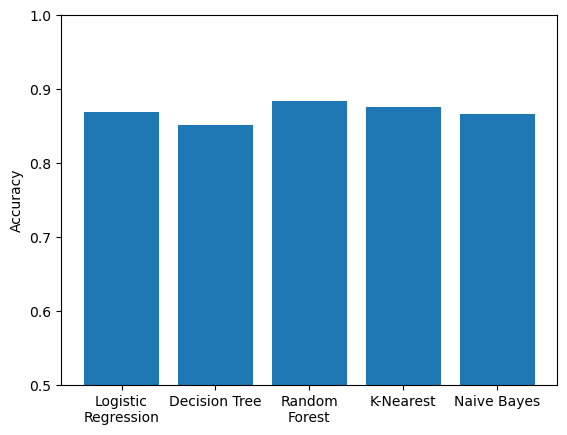

Best Model: Random
Forest


In [26]:
# plot model accuracies
models = ['Logistic\nRegression', 'Decision Tree', 'Random\nForest','K-Nearest','Naive Bayes']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy,knn_accuracy,gnb_accuracy]

plt.bar(models, accuracies)
plt.ylim(0.5, 1)
plt.ylabel('Accuracy')
plt.show()

# select best model based on accuracy
best_model = models[accuracies.index(max(accuracies))]
print('Best Model:', best_model)


### We find out that best model to work on is Random forest 

# Hyper-parameter Tuning

### Making Grid for Gridsearch 

In [42]:
from sklearn.model_selection import GridSearchCV


param_grid = {
'n_estimators': [100,150,200],
'max_depth': [2,3,5],
'min_samples_split': [ 3,7,10],
'min_samples_leaf': [2, 4,5]
}



### Finding out the best parameters 

In [43]:
from joblib import parallel_backend

with parallel_backend('threading', n_jobs=10):

    rf = RandomForestClassifier()
    rf_tuned = GridSearchCV(rf, param_grid, cv=5)
    rf_tuned.fit(X_train, y_train)
    best_params = rf_tuned.best_params_
    print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 200}


## Making a classification report of your tuned model

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


rf_tuned = RandomForestClassifier(**best_params)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Random Forest:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Tuned Random Forest:
Accuracy: 0.8925385239253852
Confusion Matrix: [[1980   75]
 [ 190  221]]
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.75      0.54      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.89      2466



# Model Deployment

### Dumping our tuned model for deployment

In [30]:
import pickle

with open('C:/Users/ridit/Downloads/aaaa/project.pkl', 'wb') as f:
    pickle.dump(rf_tuned, f)

### Selecting Range of Parameters using min-max and histograms

In [31]:
df['PageValues'].max()

361.7637419

In [32]:
df['ExitRates'].max()

0.2

In [33]:
df['ProductRelated_Duration'].max()

63973.52223

In [34]:
df['ProductRelated'].max()

705

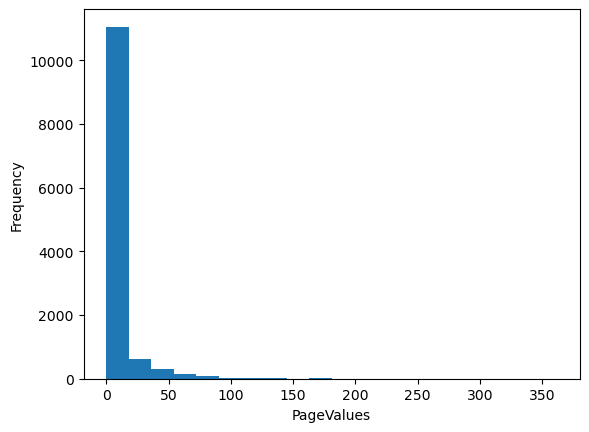

In [35]:
plt.hist(df["PageValues"], bins=20)
plt.xlabel("PageValues")
plt.ylabel("Frequency")
plt.show()

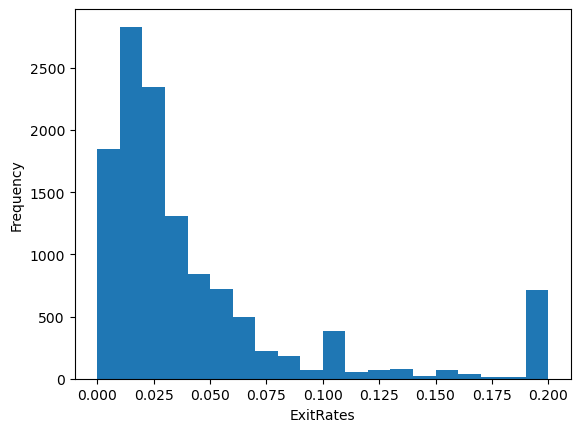

In [36]:
plt.hist(df["ExitRates"], bins=20)
plt.xlabel("ExitRates")
plt.ylabel("Frequency")
plt.show()

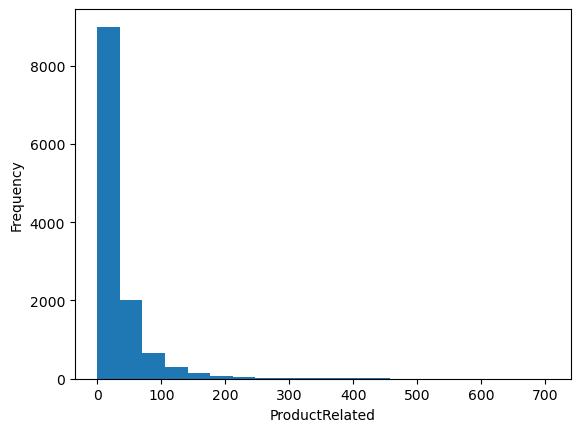

In [37]:
plt.hist(df["ProductRelated"], bins=20)
plt.xlabel("ProductRelated")
plt.ylabel("Frequency")
plt.show()

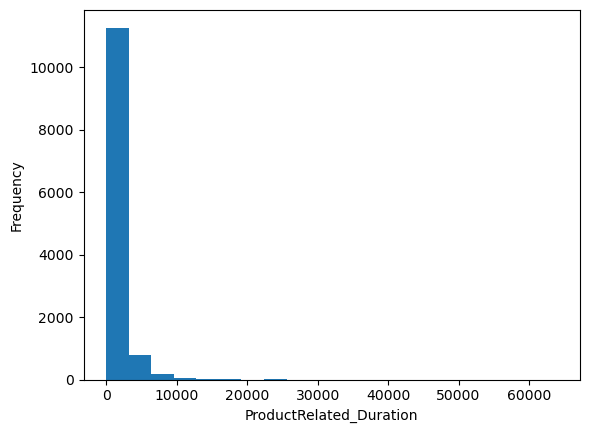

In [38]:
plt.hist(df["ProductRelated_Duration"], bins=20)
plt.xlabel("ProductRelated_Duration")
plt.ylabel("Frequency")
plt.show()